In [1]:
import numpy as np

# effect of coaching on SAT results
# y are the the effect of coaching, sigma is the standard error
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

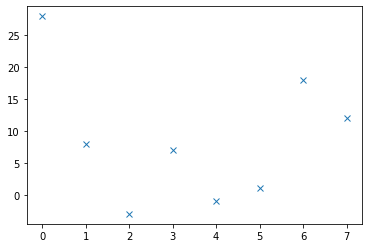

In [4]:
plt.plot(y, 'x')

In [5]:
import numpyro
import numpyro.distributions as dist

def eight_schools(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

In [6]:
from jax import random
from numpyro.infer import MCMC, NUTS

nuts_kernel = NUTS(eight_schools)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)

mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))

sample: 100%|██████████| 1500/1500 [00:04<00:00, 338.69it/s, 39 steps of size 1.73e-01. acc. prob=0.87]


In [7]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.86      3.20      5.07     -0.84      9.66    262.32      1.01
       tau      4.59      3.61      3.60      0.69      9.04     84.55      1.06
  theta[0]      6.93      6.02      6.16     -2.65     15.34    406.78      1.00
  theta[1]      5.52      4.99      5.41     -1.99     13.57    430.03      1.00
  theta[2]      4.27      5.58      4.83     -4.40     13.74    452.40      1.00
  theta[3]      5.19      5.01      5.37     -2.13     14.41    471.08      1.00
  theta[4]      3.98      4.80      4.57     -3.59     11.56    247.70      1.02
  theta[5]      4.42      5.11      4.80     -4.17     12.35    445.81      1.00
  theta[6]      7.45      5.19      6.92     -0.89     15.44    283.57      1.00
  theta[7]      5.54      5.75      5.59     -2.72     15.89    581.01      1.00

Number of divergences: 4
